In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import csv
import requests
import matplotlib
#'Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 
#'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 
#'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid',
#'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel',
#'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10'
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

idx_pd = pd.IndexSlice

**GUTHUB REPO**
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

In [2]:
file_github = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/\
master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

In [3]:
data = []
with requests.Session() as s:
    download = s.get(file_github)

    decoded_content = download.content.decode()

    cr = csv.reader(decoded_content.splitlines(), delimiter=',')
    my_list = list(cr)
    for row in my_list:
        if row[2]=='Korea':
            print(row)
        data.append(row)

In [4]:
df = pd.DataFrame(data[1:], columns=data[0])
df = df.drop(columns=['Lat', 'Long'])

In [5]:
column_dates = df.columns[2:]

In [6]:
df[column_dates] = df[column_dates].replace('', np.NaN)

In [7]:
dict_types = {}
for idx, col in enumerate(df.columns[:]):
    if idx>1:
        col_type = np.float64
    else:
        col_type = 'object'
    dict_types[col] = col_type
df = df.iloc[:,:].astype(dict_types)

In [8]:
def getting_max(x):
    print(x)
    
def new_name(x):
    if x['Province/State'] =='' or x['Province/State']==x['Country/Region']:
        name = x['Country/Region']
    else:
        name = x['Country/Region'] + '-' + x['Province/State']
    return name

In [9]:
df['Name'] = df.apply(new_name, axis=1)

In [10]:
df = df.reset_index(drop=True)
df = df.drop(columns=['Province/State', 'Country/Region'])
df = df.set_index('Name')
df = df.sort_values(by=df.columns[-1], ascending=False)
df.head(20)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
US,1.0,1.0,2.0,2.0,5.0,5.0,5.0,5.0,5.0,7.0,8.0,8.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,12.0,12.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,15.0,15.0,15.0,51.0,51.0,57.0,58.0,60.0,68.0,74.0,98.0,118.0,149.0,217.0,262.0,402.0,518.0,583.0,959.0,1281.0,1663.0,2179.0,2727.0,3499.0,4632.0,6421.0,7783.0,13677.0,19100.0,25489.0,33276.0,43847.0,53740.0,65778.0,83836.0,101657.0,121478.0,140886.0,161807.0,188172.0,213372.0,243453.0,275586.0
Italy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,20.0,62.0,155.0,229.0,322.0,453.0,655.0,888.0,1128.0,1694.0,2036.0,2502.0,3089.0,3858.0,4636.0,5883.0,7375.0,9172.0,10149.0,12462.0,12462.0,17660.0,21157.0,24747.0,27980.0,31506.0,35713.0,41035.0,47021.0,53578.0,59138.0,63927.0,69176.0,74386.0,80589.0,86498.0,92472.0,97689.0,101739.0,105792.0,110574.0,115242.0,119827.0
Spain,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,6.0,13.0,15.0,32.0,45.0,84.0,120.0,165.0,222.0,259.0,400.0,500.0,673.0,1073.0,1695.0,2277.0,2277.0,5232.0,6391.0,7798.0,9942.0,11748.0,13910.0,17963.0,20410.0,25374.0,28768.0,35136.0,39885.0,49515.0,57786.0,65719.0,73235.0,80110.0,87956.0,95923.0,104118.0,112065.0,119199.0
Germany,0.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0,4.0,5.0,8.0,10.0,12.0,12.0,12.0,12.0,13.0,13.0,14.0,14.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,17.0,27.0,46.0,48.0,79.0,130.0,159.0,196.0,262.0,482.0,670.0,799.0,1040.0,1176.0,1457.0,1908.0,2078.0,3675.0,4585.0,5795.0,7272.0,9257.0,12327.0,15320.0,19848.0,22213.0,24873.0,29056.0,32986.0,37323.0,43938.0,50871.0,57695.0,62095.0,66885.0,71808.0,77872.0,84794.0,91159.0
China-Hubei,444.0,444.0,549.0,761.0,1058.0,1423.0,3554.0,3554.0,4903.0,5806.0,7153.0,11177.0,13522.0,16678.0,19665.0,22112.0,24953.0,27100.0,29631.0,31728.0,33366.0,33366.0,48206.0,54406.0,56249.0,58182.0,59989.0,61682.0,62031.0,62442.0,62662.0,64084.0,64084.0,64287.0,64786.0,65187.0,65596.0,65914.0,66337.0,66907.0,67103.0,67217.0,67332.0,67466.0,67592.0,67666.0,67707.0,67743.0,67760.0,67773.0,67781.0,67786.0,67790.0,67794.0,67798.0,67799.0,67800.0,67800.0,67800.0,67800.0,67800.0,67800.0,67801.0,67801.0,67801.0,67801.0,67801.0,67801.0,67801.0,67801.0,67802.0,67802.0,67802.0
France,0.0,0.0,2.0,3.0,3.0,3.0,4.0,5.0,5.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,14.0,18.0,38.0,57.0,100.0,130.0,191.0,204.0,285.0,377.0,653.0,949.0,1126.0,1209.0,1784.0,2281.0,2281.0,3661.0,4469.0,4499.0,6633.0,7652.0,9043.0,10871.0,12612.0,14282.0,16018.0,19856.0,22304.0,25233.0,29155.0,32964.0,37575.0,40174.0,44550.0,52128.0,56989.0,59105.0,64338.0
Iran,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,18.0,28.0,43.0,61.0,95.0,139.0,245.0,388.0,593.0,978.0,1501.0,2336.0,2922.0,3513.0,4747.0,5823.0,6566.0,7161.0,8042.0,9000.0,10075.0,11364.0,12729.0,13938.0,14991.0,16169.0,17361.0,18407.0,19644.0,20610.0,21638.0,23049.0,24811.0,27017.0,29406.0,32332.0,35408.0,38309.0,41495.0,44605.0,47593.0,50468.0,53183.0
United Kingdom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,8.0,8.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,13.0,13.0,13.0,15.0,20.0

In [11]:
df.index.tolist()

['US',
 'Italy',
 'Spain',
 'Germany',
 'China-Hubei',
 'France',
 'Iran',
 'United Kingdom',
 'Turkey',
 'Switzerland',
 'Belgium',
 'Netherlands',
 'Austria',
 'Korea, South',
 'Portugal',
 'Brazil',
 'Israel',
 'Sweden',
 'Canada-Quebec',
 'Norway',
 'Ireland',
 'Russia',
 'Czechia',
 'Denmark',
 'Chile',
 'Poland',
 'Ecuador',
 'Malaysia',
 'Canada-Ontario',
 'Romania',
 'Philippines',
 'Pakistan',
 'Japan',
 'Luxembourg',
 'India',
 'Australia-New South Wales',
 'Saudi Arabia',
 'Indonesia',
 'Thailand',
 'Finland',
 'Greece',
 'Peru',
 'China-Guangdong',
 'Mexico',
 'South Africa',
 'Dominican Republic',
 'Serbia',
 'Panama',
 'Iceland',
 'China-Henan',
 'Colombia',
 'Argentina',
 'United Arab Emirates',
 'China-Zhejiang',
 'Canada-British Columbia',
 'Algeria',
 'Singapore',
 'Australia-Victoria',
 'Croatia',
 'Qatar',
 'Ukraine',
 'China-Hunan',
 'China-Anhui',
 'Egypt',
 'Canada-Alberta',
 'Estonia',
 'China-Jiangxi',
 'Slovenia',
 'Australia-Queensland',
 'New Zealand',
 'Chi

In [12]:
names_to_plot =  ['Colombia', 'Argentina', 'Peru', 'Chile', 'Mexico', 'US', 'Italy']

In [13]:
for per_name in df.index.tolist()[:10]:
    if per_name not in names_to_plot:
        names_to_plot.append(per_name)

In [14]:
names_to_plot

['Colombia',
 'Argentina',
 'Peru',
 'Chile',
 'Mexico',
 'US',
 'Italy',
 'Spain',
 'Germany',
 'China-Hubei',
 'France',
 'Iran',
 'United Kingdom',
 'Turkey',
 'Switzerland']

In [15]:
personal_names = ['Japan', 'Singapore', 'China-Hong Kong', 'US', 'Norway', 'Sweden',
                   'Panama', 'Colombia', 'Peru', 'Chile', 'Argentina', 'Ecuador',  'Russia',
                  'Mexico', 'Brazil', 'Uruguay', 'Australia-New South Wales', 'Russia']

In [16]:
for per_name in personal_names:
    if per_name not in names_to_plot:
        names_to_plot.append(per_name)

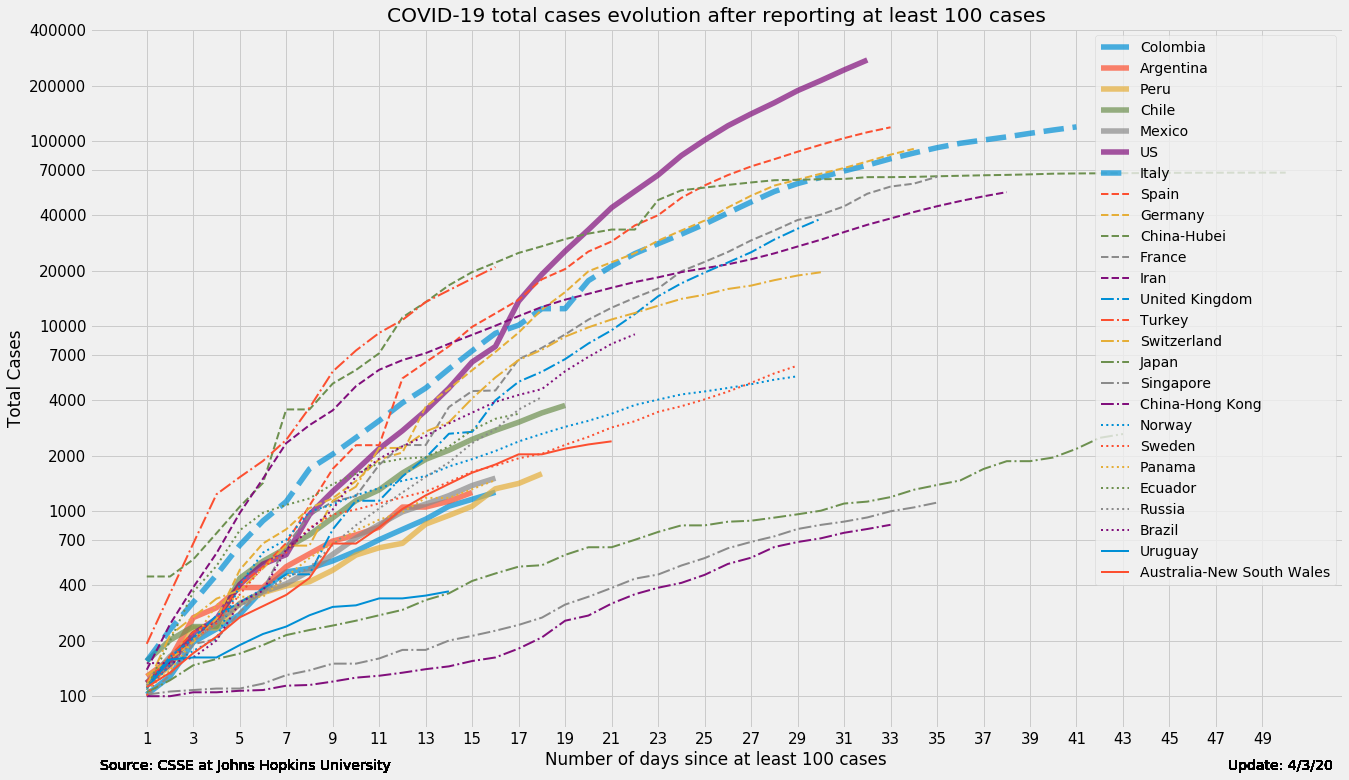

In [17]:
fig, ax = plt.subplots(figsize=(20,12))
LINE_STYLES = ['solid', 'dashed', 'dashdot', 'dotted', 'solid',]
colors = [f'C{i}' for i in range(6)]

low_cases = 100
high_cases = 400000
max_periods = 50
ls = 0
count = 0
for name in names_to_plot:
    row = df.loc[name, :]
    if name in names_to_plot:
        if (row.min()<0.1*high_cases) & (name not in []):
            c_i = colors[count]
            ls_i = LINE_STYLES[ls]
            current_data = row[(row>=low_cases) & (row<=high_cases)]
            if len(current_data)>0:
                values_to_plot = current_data.values[:max_periods]
                if name in ['Colombia', 'Argentina', 'Peru', 'Chile', 'Mexico', 'US', 'Italy']:
                    ax.plot(np.arange(1,len(values_to_plot)+1), values_to_plot, label=name, lw=5.5, 
                            linestyle=ls_i, color=c_i, alpha=0.7)
                else:
                    ax.plot(np.arange(1,len(values_to_plot)+1), values_to_plot, label=name, lw=2., 
                            linestyle=ls_i, color=c_i)
            # Changing colors
            if count>4:
                count=0
                ls+=1
            else:
                count+=1
        else:
            pass
    ax.legend(fontsize=14)
    ax.set_yscale('log')
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.set_yticks([10**i*j*low_cases for j in [1,2, 4, 7] for i in np.arange(0, 4.0, 1.0) if 10**i*j*low_cases<500000])
    ax.set_xticks(range(1, max_periods,2))
    ax.set_xlabel(f'Number of days since at least {low_cases} cases')
    ax.set_ylabel("Total Cases")
    ax.text(max_periods*0.95, low_cases*0.4, f'Update: {df.columns[-1]}')
    ax.text(-1, low_cases*0.4, 'Source: CSSE at Johns Hopkins University')
    ax.set_title(f"COVID-19 total cases evolution after reporting at least {low_cases} cases")
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.tick_params(axis='both', which='minor', labelsize=15)
plt.show()